# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 3
# Negative feedback

#### Alba Mas and Maria Cobo

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

The objectives of this practical are:
- to become familiar with numerical integration of dynamical systems using scipy's odeint function.
- to become familiar with the basic models of gene regulation for basal expression and transcriptional repression.
- to understand the differences between unregulated gene expression and negative autoregulation.
- to explore the effects of saturation in the controller of an integral feedback control system
    
    

In [76]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical integration

We will use scipy's odeint function to numerically integrate ODEs. Here is an example:

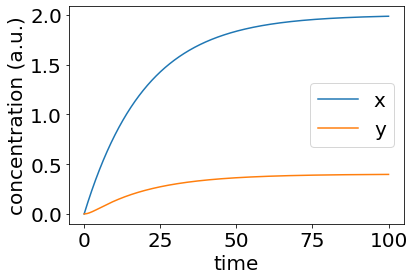

In [77]:
def test(xy,t):
    x,y=xy
    dx=alpha1-delta1*x
    dy=alpha2*x-delta2*y
    return [dx,dy]

alpha1 = 0.1
alpha2 = 0.1
delta1 = 0.05
delta2 = 0.5
tvec = np.arange(0,100,0.01)
x0 = [0,0]
y = odeint(test,x0,tvec)
plt.figure()
plt.rc('font', size=20)
plt.plot(tvec,y[:,0],label='x')
plt.plot(tvec,y[:,1],label='y')
plt.legend()
plt.xlabel('time')
plt.ylabel('concentration (a.u.)')
plt.show()

# Constitutive expression

The following equation can be used to model the constitutive expression of a gene:
    
$$\frac{dP}{dt}=\alpha-\delta P$$

1. Consider $\alpha=10$ and $\delta = 1$.
    1. What is the analytic expression for the steady state of the system?
    2. Plot the time evolution of the system starting from $P_0=0$ using scipy's odeint function.
    3. Does the final value of the trajectory in b) coincide with the analytical steady state?
    4. At what time does P reach half the steady state value? Plot a vertical line at that point.


<span style="color:blue">**The final value of the protein concentration is 9.99954144 and when we calculate the steady state analytically it give us a value of 10. The time at which the protein concentration reaches half its steady state is: 0.7**</span>

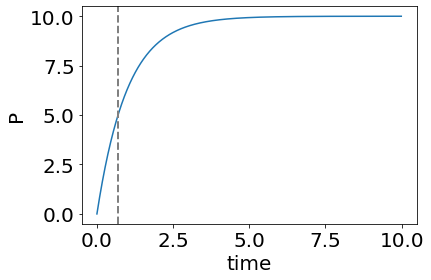

The final value of the protein concentration is: 9.999541435840129
The time at which the protein concentration reaches half its steady state is: 0.7


In [78]:
def cons_expre(P, t, alpha, delta):
    dP = alpha - delta * P
    return dP

alpha = 10
delta = 1

# Ssteady-state and half steady-state
ss = alpha / delta
half_ss = ss / 2

# Time vector
tvec = np.arange(0, 10, 0.01)

x0 = 0

y = odeint(cons_expre, x0, tvec, args=(alpha, delta))

# Plot the protein concentration over time
plt.figure()
plt.plot(tvec, y, label='P(t)')

# Time at which the protein concentration reaches half its steady state
time_half_ss = tvec[np.where(y[:, 0] >= half_ss)[0][0]]

# Vertical line at the time when the protein concentration is half of steady state
plt.axvline(x=time_half_ss, color='gray', linestyle='dashed', linewidth=2, label=f'Half SS time: {time_half_ss:.2f}')


plt.xlabel('time')
plt.ylabel('P')
plt.show()

print("The final value of the protein concentration is:", y[-1, 0])
print(f"The time at which the protein concentration reaches half its steady state is: {time_half_ss:.1f}")


2. What happens for the following parameter sets, in comparison with the previous one? Plot the four of them in the same plot and compare them. 
    1. alpha=10, delta=10
    2. alpha=100, delta=10
    3. alpha=100, delta=1
 

For alpha = 10, delta = 1, the time to reach half of the steady state concentration is: 0.69
For alpha = 10, delta = 10, the time to reach half of the steady state concentration is: 0.07
For alpha = 100, delta = 10, the time to reach half of the steady state concentration is: 0.07
For alpha = 100, delta = 1, the time to reach half of the steady state concentration is: 0.69


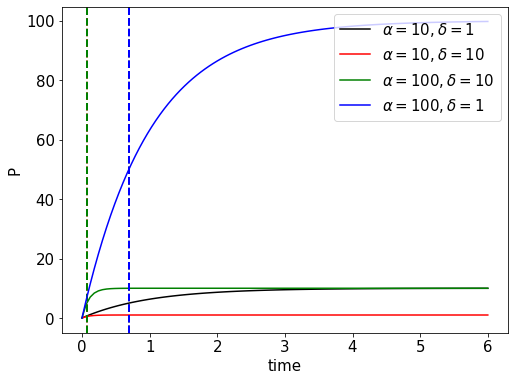

In [79]:
def exponential(P, t, alpha, delta):
    dP = alpha - delta * P
    return dP

parameters = [(10, 1), (10, 10), (100, 10), (100, 1)]

P0 = 0
tvec = np.linspace(0, 6, 100)

# Colors and labels for the different parameter sets
colors = ['black', 'red', 'green', 'blue']
labels = [r'$\alpha = 10, \delta = 1$', 
          r'$\alpha = 10, \delta = 10$', 
          r'$\alpha = 100, \delta = 10$', 
          r'$\alpha = 100, \delta = 1$']

plt.figure(figsize=(8, 6))
plt.rc('font', size=15)

for i, (alpha, delta) in enumerate(parameters):
    y = odeint(exponential, P0, tvec, args=(alpha, delta))
    plt.plot(tvec, y, color=colors[i], label=labels[i])
    
    # Calculate half-life based on delta
    t_half = np.log(2) / delta
    plt.axvline(x=t_half, color=colors[i], linestyle='dashed', linewidth=2)
    
    print(f"For alpha = {alpha}, delta = {delta}, the time to reach half of the steady state concentration is: {t_half:.2f}")

plt.xlabel('time')
plt.ylabel('P')
plt.legend(loc='upper right')
plt.show()


<span style="color:blue">**This plot shows the behaviour of our system under different parameters of alpha and delta. For α=10,δ=1 (black curve), the system reaches slowly a steady-state concentration of 10 with a half time of 0.7 due to lower degradation rate. For α=10,δ=10 (red curve), the delta value is increased and the steady-state concentration decreases to 1 and it reaches half time very quickly (0.07), showing a faster degradation. For α=100,δ=10 (green curve), alpha and delta values are increased and also reach a steady-state concentration of 10 but it reaches it in a much faster way (0.07), again, due to higher degradation. Finally, for α=100,δ=1 (blue curve), with a high alpha and small delta, the system reaches a high steady-state concentration of 100, but it does it slower in time (0.7) due to the slower degradation rate. In conclusion, we can see that a higher degradation rate leads to faster dynamics and lower steady states, while higher production rates increase the steady-state concentration.**</span>

# Negative feedback

Now consider the following negative autoregulation system:


$$\frac{dR}{dt}=\frac{\alpha}{1+\left(\frac{R}{K}\right)^n} - \delta R$$

1. Plot the production term for alpha=5, K=1, and n ranging from 1 to 6, for a range of R values from 0 to 5. What is the effect of increasing n?

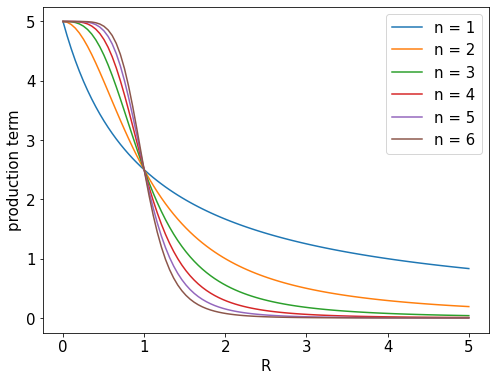

In [80]:
alpha = 5
K = 1
R = np.linspace(0, 5, 100)  # Range of R values

# Production term for n ranging from 1 to 6
plt.figure(figsize=(8, 6))

for n in range(1, 7):
    production_term = alpha / (1 + (R / K) ** n)
    plt.plot(R, production_term, label=f'n = {n}')

plt.xlabel('R')
plt.ylabel('production term')
plt.legend()
plt.show()

<span style="color:blue">**Increasing nn increases the cooperativity of the repressor binding. This means that the system's response to changes in RR becomes more steep and sharp, with a more abrupt switch from high to low production rates as RR increases.**</span>

2. Now fix n to 4, and plot the production term for K = 1, 2, and 4. What is the effect?

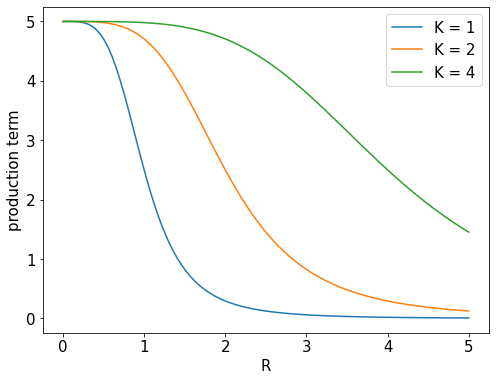

In [81]:
alpha = 5
n = 4
R = np.linspace(0, 5, 100) 

# Production term for different values of K
plt.figure(figsize=(8, 6))

for K in [1, 2, 4]:
    production_term = alpha / (1 + (R / K) ** n)
    plt.plot(R, production_term, label=f'K = {K}')

# Effect of K on the Production Term (n = 4)
plt.xlabel('R')
plt.ylabel('production term')
plt.legend()
plt.show()


<span style="color:blue">**Increasing K lowers the sensitivity to repressor concentration. As K increases, the system becomes less sensitive to changes in R. The gene remains active at higher concentrations of the repressor, and the repression becomes less sharp and occurs over a wider range of R. This means the repressor's binding affinity to the promoter is reduced as K increases, so the system is more likely to allow transcription to occur even in the presence of repressor molecules.**</span>

3. If you wanted to build a repression system that is highly repressed at low values of repressor, how would you choose K and n? (in terms of low/high values) 

<span style="color:blue">**For high repression at low repressor values, we should choose low K that ensures that the repressor binds effectively even at low concentrations and a high n that ensures that once the repressor starts to bind, the repression ramps up sharply, making the system highly sensitive to even small increases in repressor concentration.
A low K and high n would give a highly sensitive repression system that can quickly switch from active to highly repressed when the repressor concentration is low, making it ideal for systems where we want very strong repression even at low repressor levels.**</span>

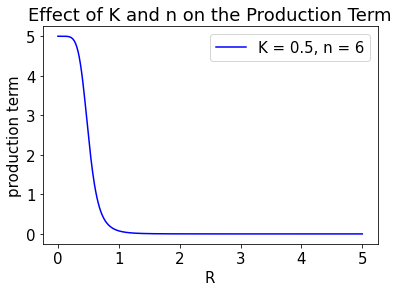

In [82]:
alpha = 5  # Production rate
K = 0.5    # Dissociation constant
n = 6      # Cooperativity factor
delta = 0.1  # Degradation rate

def production_rate(R, alpha, K, n):
    return alpha / (1 + (R / K)**n)

# Range of repressor concentration values (R)
R_values = np.linspace(0, 5, 500)

# Calculate the production rate for each R
production_values = production_rate(R_values, alpha, K, n)

# Plot the production rate against repressor concentration
plt.plot(R_values, production_values, label=f'K = {K}, n = {n}', color='blue')

plt.xlabel('R')
plt.ylabel('production term')
plt.title('Effect of K and n on the Production Term')
plt.legend()
plt.show()

# Study the response timescale of the system:

1. We will now compare how quickly the two models introduce above generate their product. To that end:
    1. Integrate the negative feedback model for $n=4$, $K=1$, $\alpha=10$ and $\delta=1$, starting from $R=0$ and compute the time to reach half the steady state concentration.
    2. Integrate the constitutive expression model with $\alpha=1.5$ and $\delta=1$ starting from $R=0$ and compute the time to reach half the steady state concentration. 
    3. Compare the results of B) and C).

Time to reach half the steady state for the neg. feedback model 0.1
Steady state 1.53301279864696


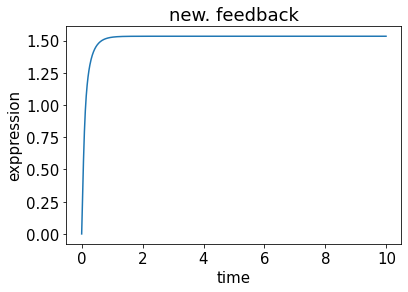

In [83]:
# Write your code here
alpha = 10
delta = 1
n = 4
K = 1
R0 = 0

def neg_feedback(R, t, alpha, K, n, delta):
    dR = (alpha / (1 + (R / K) ** n)) - delta * R
    return dR 


tvec = np.arange(0, 10, 0.01)

y = odeint(neg_feedback, R0, tvec, args=(alpha, K, n, delta))

# Steady-state concentration
def steady_state_eq(R_ss, alpha, K, n, delta):
    return alpha / (1 + (R_ss / K) ** n) - delta * R_ss

R_ss = fsolve(steady_state_eq, 1, args=(alpha, K, n, delta))[0]  # Numerically solve for R_ss
half_R_ss = R_ss / 2

# Time to reach half the steady-state concentration
time_half_ss = tvec[np.where(y[:, 0] >= half_R_ss)[0][0]]
print(f"Time to reach half the steady state for the neg. feedback model {time_half_ss:.1f}")
print(f"Steady state", R_ss)

plt.figure()
plt.plot(tvec, y)
plt.xlabel('time')
plt.ylabel('exppression')
plt.title('new. feedback')
plt.show()


Time to reach half the steady state for the constitutive model 0.7
Steady state 1.5


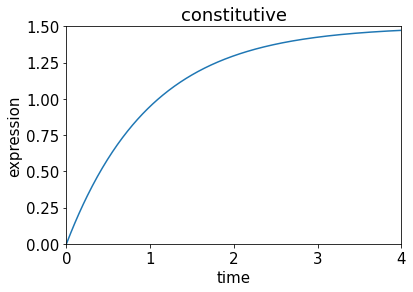

In [84]:
alpha = 1.5
delta = 1
R0 = 0  # Initial concentration

def cons_expre(P, t, alpha, delta):
    dP = alpha - delta * P
    return dP  

tvec = np.arange(0, 10, 0.01)

y = odeint(cons_expre, R0, tvec, args=(alpha, delta))

# Steady-state concentration and half-steady-state concentration
P_ss = alpha / delta
half_ss = P_ss / 2

# Time at which the protein concentration reaches half its steady state
time_half_ss = tvec[np.where(y[:, 0] >= half_ss)[0][0]]
print(f"Time to reach half the steady state for the constitutive model {time_half_ss:.1f}")
print("Steady state", P_ss)

plt.figure()
plt.plot(tvec, y)
plt.xlabel('time')
plt.ylabel('expression')
plt.title('constitutive')
plt.xlim(0, 4)
plt.ylim(0, 1.5)
plt.show()


<span style="color:blue">**In our results, on one hand, we can see that the constitutive (constant) expression increases smoothly and exponentially towards a teady-state value. In this case, the production is constant and independent of the protein concentration. On the other hand, we have the negative feedback model where we can see the protein concentration rising rapidly but slows as the concentration increases. This is due to the negative feedback process that reduces production when protein levels are high, leading to self-regulation.**</span>

# Adaptation to perturbations

Integrate the negative feedback model for n=4, K=1, $\alpha=10$ and $\delta=1$, starting from R=0, for 10 time units. At that point, double the value of $\alpha$ and integrate for another 10 time units. Does the system return to the same steady state as before?

1.53301279864696
1.786805275986805


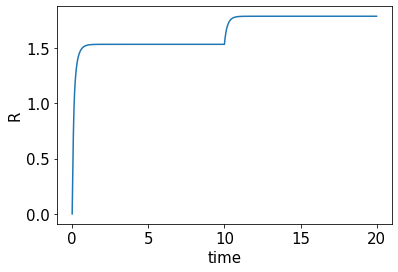

In [85]:
# Write your code here
n = 4
K = 1
alpha_initial = 10
delta = 1
R0 = 0 

def neg_feedback(R, t, alpha, K, n, delta):
    dR = (alpha / (1 + (R / K) ** n)) - delta * R
    return dR 

# Time vector for the first 10 units
tvec1 = np.arange(0, 10, 0.01)
# Solve the ODE for the first 10 time units
y1 = odeint(neg_feedback, R0, tvec1, args=(alpha_initial, K, n, delta))

# Double alpha and integrate for another 10 time units
alpha_doubled = 2 * alpha_initial
tvec2 = np.arange(10, 20, 0.01)

# Solve the ODE for the second 10 time units
y2 = odeint(neg_feedback, y1[-1], tvec2, args=(alpha_doubled, K, n, delta))

# Combine the results
tvec_combined = np.concatenate([tvec1, tvec2])
y_combined = np.concatenate([y1, y2])

# Determine the steady-state concentration before and after doubling alpha
def steady_state_eq(R_ss, alpha, K, n, delta):
    return alpha / (1 + (R_ss / K) ** n) - delta * R_ss

# Steady state for initial alpha
R_ss_initial = fsolve(steady_state_eq, 1, args=(alpha_initial, K, n, delta))[0]
print(R_ss_initial)

# Steady state for doubled alpha
R_ss_doubled = fsolve(steady_state_eq, 1, args=(alpha_doubled, K, n, delta))[0]
print(R_ss_doubled)

plt.plot(tvec_combined, y_combined)
plt.xlabel('time')
plt.ylabel('R')
plt.show()

<span style="color:blue">**Our plot shows that after doubling the value of alpha (α), the system does not return to the original steady state. Instead, it reaches a new higher steady state. This is due to the system’s equilibrium shifts which then results in a higher output R after the transition.**</span>

Do the same for the constitutive expression model.

10.0
20.0


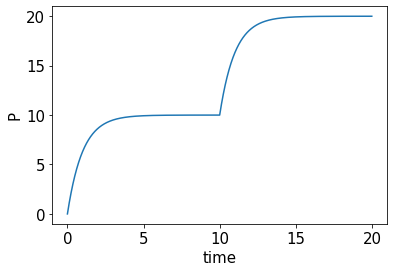

In [86]:
# Write your code here
alpha_initial = 10
delta = 1
R0 = 0

def cons_expre(P, t, alpha, delta):
    dP = alpha - delta * P
    return dP  

# Time vector for the first 10 units
tvec1 = np.arange(0, 10, 0.01)

y1 = odeint(cons_expre, R0, tvec1, args=(alpha_initial, delta))

# Double alpha and integrate for another 10 time units
alpha_doubled = 2 * alpha_initial
tvec2 = np.arange(10, 20, 0.01)

y2 = odeint(cons_expre, y1[-1], tvec2, args=(alpha_doubled, delta))

# Combine the results
tvec_combined = np.concatenate([tvec1, tvec2])
y_combined = np.concatenate([y1, y2])

# Determine the steady-state concentration before and after doubling alpha
P_ss_initial = alpha_initial / delta
print(P_ss_initial)
P_ss_doubled = alpha_doubled / delta
print(P_ss_doubled)


plt.plot(tvec_combined, y_combined)
plt.xlabel('time')
plt.ylabel('P')
plt.show()


<span style="color:blue">**In the constitutive model, as we double the value of alpha, the setady state does not return to its original state. Instead, the value doubles as alpha does. So, the consitutive model shows an increase in the steady state of P as the production rate is increased, with no regulatory feedback to bring it back to its original steady state.**</span>

Interpret the results above in terms of the difference in robustness between the two models.

<span style="color:blue">**The negative feedback model shows a greater robustness due to its ability to regulate the system’s response to changes in production rate. As alpha is doubled, the system moves toward a new steady state in a controlled way, showing resilience/robustness against large changes.
In contrast, the constitutive model does not have such regulatory mechanisms and acts in a much more sensitive and linear way, resulting to less robustness. Any change in alpha directly changes the steady-state output, making the system more vulnerable to environmental or parameter variations**</span>